In [1]:
# Standard modules
import pdb
import sys
import os
import pickle
#import numpy as np
#import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import gridspec
font = {'size'   : 11.5}
matplotlib.rc('font', **font)

sys.path.append("../..")

from simstackplots import SimstackPlots
from simstacktoolbox import SimstackToolbox

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

In [2]:
pickle_path_suffix = "cosmos2020_farmer_nuvrj_0p01_0p5_1_1p5_2_2p5_3_3p5_4_5_6_8_10_X_4_foregnd_atonce_bootstrap_1-150"
pickle_path = os.environ['PICKLESPATH']+'/'+os.path.join("simstack","stacked_flux_densities",pickle_path_suffix)
file_path = os.path.join(pickle_path, pickle_path_suffix+".pkl")

In [3]:
# Import saved stacking measurement
simstack_object = SimstackToolbox.import_saved_pickles(file_path)

In [4]:
from simstackplots import SimstackPlots
simstack_object = SimstackPlots(simstack_object)

In [9]:
sample_number = 15000
sample_discard = 3000
sample_sigma = 3
sample_speed = ''
sample_prior = '_mixed_prior_qt'
sample_prefix = "{}-{}-{}sigma{}{}".format(sample_number, sample_discard, sample_sigma, sample_speed, sample_prior)
print(sample_prefix)

15000-3000-3sigma_mixed_prior_qt


In [10]:
samples_filename = '_'.join(['mcmc_samples',sample_prefix,'dict'])+'.pkl'
if os.path.isfile(os.path.join(pickle_path,samples_filename)):
    flat_samples_dict = SimstackToolbox.import_saved_pickles(os.path.join(pickle_path,samples_filename))
else:
    print(os.path.join(pickle_path,samples_filename), 'not found')

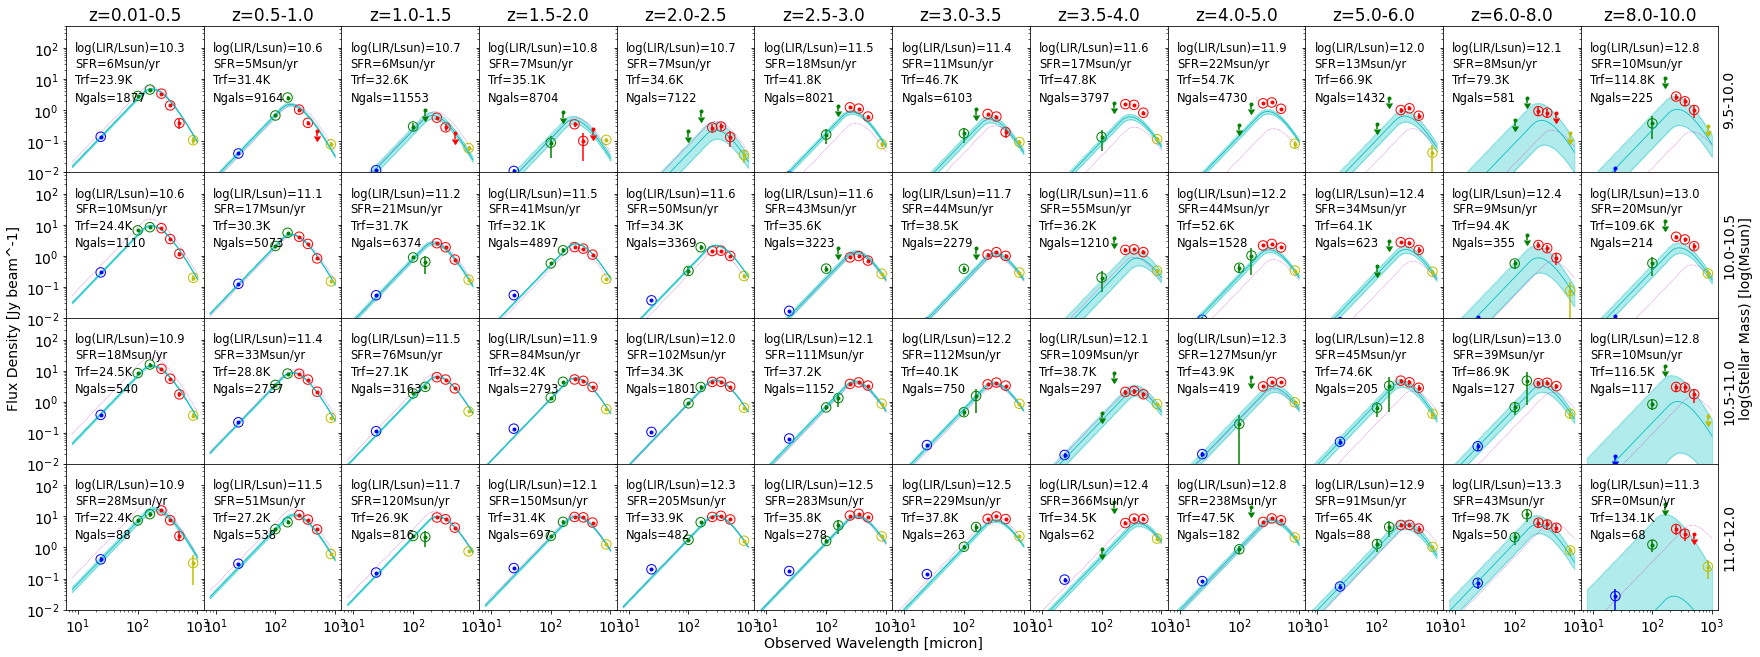

In [11]:
fig_path = 'C:/Users/viero/Repositories/viero2022/figures'
fig_filename="SEDs_"+sample_prefix+"_SFG.pdf"
simstack_object.plot_mcmc_seds(flat_samples_dict, show_qt=False, bootstrap_dict=None, errors=('25', '75'),save_path=fig_path,save_filename=fig_filename)

# Import saved LIR dict and Plot Dust Temperature

In [15]:
lir_filename = '_'.join(['lir',sample_prefix,'dict'])+'.pkl'
if os.path.isfile(os.path.join(pickle_path,lir_filename)):
    lir_dict = SimstackToolbox.import_saved_pickles(os.path.join(pickle_path,lir_filename))
else:
    print(lir_filename, 'not found')

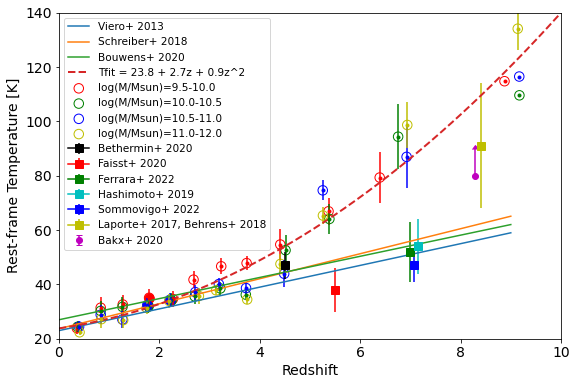

In [16]:
not_flat_prior = ['redshift_1.5_2.0__stellar_mass_9.5_10.0__split_params_1',
                  'redshift_1.5_2.0__stellar_mass_10.0_10.5__split_params_1',
                  'redshift_1.5_2.0__stellar_mass_10.5_11.0__split_params_1',
                  'redshift_2.0_2.5__stellar_mass_10.0_10.5__split_params_1',
                  'redshift_2.0_2.5__stellar_mass_10.5_11.0__split_params_1']
fig_path = 'C:/Users/viero/Repositories/viero2022/figures'
fig_filename="Tdust_"+sample_prefix+".pdf"
simstack_object.plot_rest_frame_temperature(lir_dict,  xlim=[0, 10], ylim=[2e1, 140], ylog=False, not_flat_prior=not_flat_prior,print_values=False, save_path=fig_path,save_filename=fig_filename)

# Import saved SFR dict and Plot SFRD

In [17]:
tsfrd_filename =  '_'.join(['total_sfrd',sample_prefix,'dict'])+'.pkl'
if os.path.isfile(os.path.join(pickle_path,tsfrd_filename)):
    total_sfrd_dict = SimstackToolbox.import_saved_pickles(os.path.join(pickle_path,tsfrd_filename))
else:
    print(os.path.join(pickle_path,tsfrd_filename), 'not found')

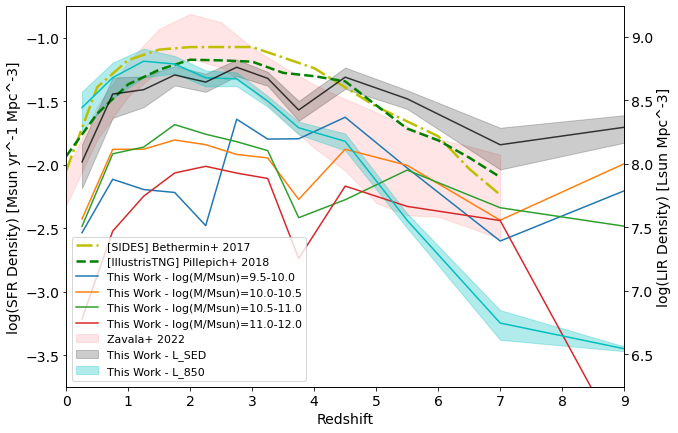

In [18]:
fig_path = 'C:/Users/viero/Repositories/viero2022/figures'
fig_filename="SFRD_"+sample_prefix+".pdf"
simstack_object.plot_total_sfrd(total_sfrd_dict, save_path=fig_path, save_filename=fig_filename)